# Facebook Commenter Analytics (Commenter)
----
In this notebook, we will explore user that has comment many comment and see their behavior.

In [3]:
import pandas as pd
import numpy as np
from pythainlp.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
mpl.rc('font',family='JasmineUPC')
mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15) 
%matplotlib inline

In [4]:
import plotly 
plotly.tools.set_credentials_file(username='TeerapatChaiwachirasak', api_key='RMqZv6z9pSmGeRafgNnS')
import plotly.plotly as py
import plotly.graph_objs as go

In [5]:
#Test reading from .tsv
commentDf = pd.read_csv('../dataset/facebook_comment.tsv',sep ='\t')
commentDf['message'] = np.nan_to_num(commentDf['message'])
commentDf = commentDf[['commenter_name','created_time','like_count','message','service']]
commentDf['created_date'] = pd.to_datetime(commentDf['created_time'], format='%Y-%m-%d %H:%M:%S.%f')
commentDf['created_date_format'] = commentDf['created_date'].apply(lambda x: x.replace(hour=0, minute=0, second=0, microsecond=0))
commentDf['service'][commentDf['service']==True] = 'TRUE'
commentDf.head()

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning:

Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,commenter_name,created_time,like_count,message,service,created_date,created_date_format
0,Nui Worabut,2016-06-01 12:53:00,1.0,ใช้โปรเสริม net non..9 gb ใช้หมดลดความเร็วไม่...,DTAC,2016-06-01 12:53:00,2016-06-01
1,Chandratithaya Je-u,2016-06-02 17:17:32,0.0,ใช้ดีแทค แล้วปวดใจจริงๆ สัญญานขาดหาย อินเตอร์เ...,DTAC,2016-06-02 17:17:32,2016-06-02
2,Hataichanok Maklamai,2016-06-02 07:51:45,0.0,ส่งขอมูลไปทาง ib แล้วนะคะ รบกวนตอบด้วยคะ ส่งไป...,DTAC,2016-06-02 07:51:45,2016-06-02
3,Nattapong Wongsa,2016-06-02 15:43:53,1.0,อะไรนี้...ไม่เปิดให้เติมเกมส์ใช้ปะ จะได้เลิกใช้,DTAC,2016-06-02 15:43:53,2016-06-02
4,Jitsak Sisawad,2016-06-02 15:09:06,0.0,ห่วยแตกไม่เคยแจ้งข่าวสารให้ลูก อยู่ๆก้มาเก็บค่...,DTAC,2016-06-02 15:09:06,2016-06-02


## Here we are going to look at top commenters (commenter whose comment a lot)
---------------------------

In [6]:
commentDf['commenter_name'].value_counts().head(10)

ธนิด ภัทรกิตติ      1830
อนันต์ ด้า           548
TrueMove H           399
AIS                  237
Joe KonTummada       182
Kittithat Tri        177
Artinut Nopparat     156
Bosa Bisabo          142
เชยกลิ่น แล้วงัย     140
Back Green           139
Name: commenter_name, dtype: int64

## Let's also find top 3 commenter for each of the service provider
--------

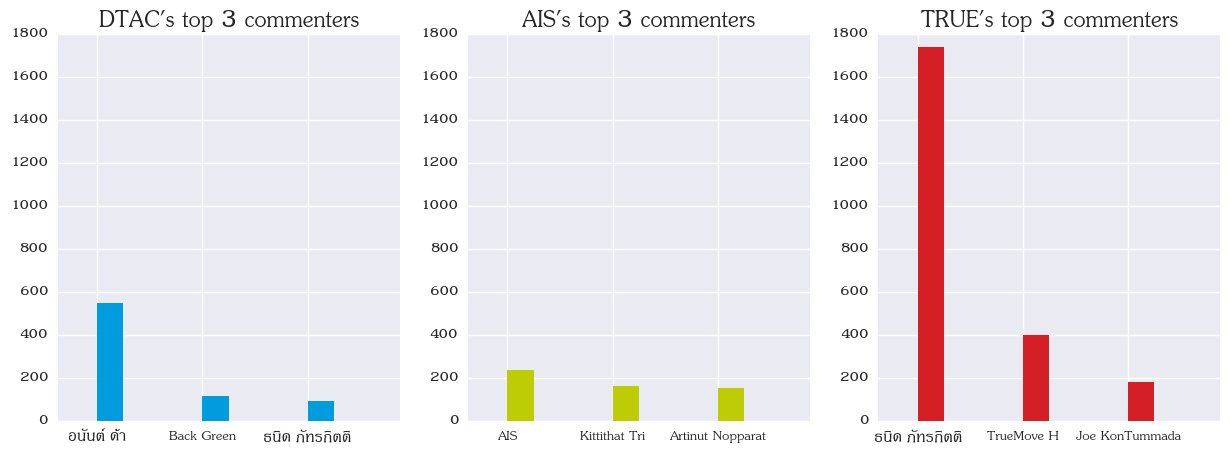

In [7]:
def topCommenter():
    colors = ['#019CDE','#BCCD05','#D51F26']
    fig,ax = plt.subplots(1,3,figsize=(15,5))
    for i,service in enumerate(['DTAC','AIS','TRUE']):
        topCommenter = commentDf['commenter_name'][commentDf['service']==service].value_counts().head(3)
        ax[i].bar([0.75,2.75,4.75],topCommenter,width=0.5,color=colors[i],edgecolor = "none")
        ax[i].set_xlim((0,6.5))
        ax[i].set_ylim((0,1800))
        ax[i].set_title(service+"'s top 3 commenters",fontsize=25)
        ax[i].set_xticks([0.75,2.75,4.75])
        ax[i].set_xticklabels(topCommenter.index.values)    
    plt.show()
topCommenter()

### Let's focus on คุณ ธนิด ภัทรกิตติ first.
-----------

ธนิด ภัทรกิตติ has 1830 comments.
Sample comment : 


,message,created_date_format,service
139351,รียนคณะกรรมการ กสทช./ สำนักงานตำรวจแห่งชาติ\nเ...,2016-11-02,TRUE
139349,คุณนิพนธ์ คุณสุรชาติ คณอรอุมา และเจ้าหน้าที่ 1...,2016-11-02,TRUE
140842,ใครอยากได้ค่าโทรฟรีจากทรู ร้องเรียนทรู ที่ 133...,2016-11-21,TRUE
144513,เรียนคณะกรรมการ กสทช.\nเมื่อวานเซเว่นส่งข้อควา...,2016-12-06,TRUE
154647,คุณพรนภายังไม่โทรหาผมนะครับ,2017-02-17,TRUE
163608,ทางช็อบไร้มารยาทมากๆ ให้ผมรอคำตอบนาน 5 ชั่วโมง...,2017-04-04,TRUE
164162,ตอนเที่ยงผมโทรคุยกับ­คุณเพียงตะวัน คุณเพียงตะว...,2017-04-05,TRUE


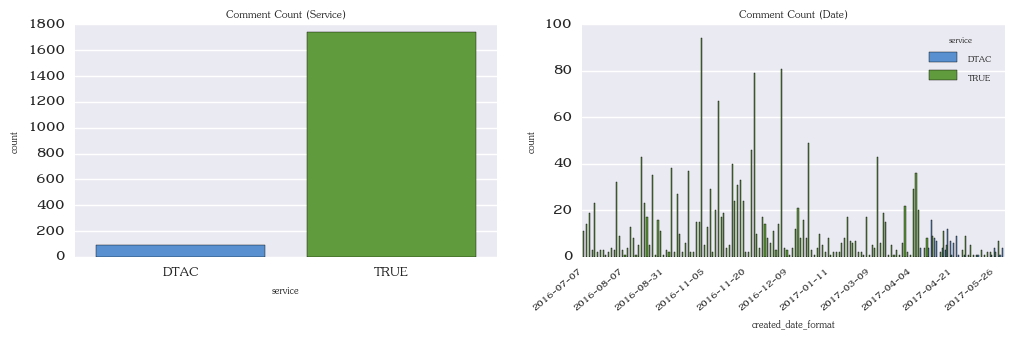

In [31]:
def commentFromUser(name):
    return commentDf[commentDf['commenter_name']==name]
from datetime import datetime

def analyzeUserComment(name):
    color = ['dark sky blue','grass','reddish orange']
    colors = sns.xkcd_palette(color)
    comment = commentFromUser(name)
    print("%s has %d comments."%(name,comment.shape[0]))
    print("Sample comment : ")
    fig, axs = plt.subplots(ncols=2,figsize=(12,3))
    sns.countplot(x="service", data=comment,palette=colors,ax=axs[0])
    axs[0].set_title('Comment Count (Service)')
    sns.countplot(x="created_date_format", data=comment,hue='service',palette=colors,ax=axs[1])
    #axs[1].set_xticks([])
    #axs[1].set_xticklabels([])d = ts
    dateStr = [str(i)[10:20] for i in list(axs[1].get_xticklabels())]
    if(len(dateStr)>=10):
        dateStr = [date if (i%int(len(dateStr)/10))==0  else "" for i,date in enumerate(dateStr) ]
        
    axs[1].set_xticklabels(dateStr, rotation=40, ha="right",size=10)
    axs[1].set_title('Comment Count (Date)')
    return comment[['message','created_date_format','service']].sample(7).sort_values('created_date_format')
    
analyzeUserComment('ธนิด ภัทรกิตติ')

In [7]:
commentByDate = commentDf[commentDf['commenter_name']=='ธนิด ภัทรกิตติ']['created_date_format'].value_counts().sort_index()
x = commentByDate.index.values
y = commentByDate.values
data = [go.Scatter(
          x=x,
          y=y
        )]
py.iplot(data)

As you can see, most of the comment are negative towards TRUE (and little bit to DTac). We can assume that he is very active in using social media given the amount of comment he did.

### Moving on, let's see top commenter from Dtac
--------

อนันต์ ด้า has 548 comments.
Sample comment : 


,message,created_date_format,service
16641,เน็ตเหี้ยมาก,2016-09-22,DTAC
19768,ไม่ได้เรื่อง ใช้ไม่ได้,2016-10-25,DTAC
21855,NaN,2016-11-09,DTAC
21891,NaN,2016-11-09,DTAC
23635,ไอ้โคตรพ่อโคตรแม่มึงใช้ดู,2016-11-19,DTAC
44711,ลื่นเหี้ยอะไร,2017-02-12,DTAC
49429,NaN,2017-03-05,DTAC


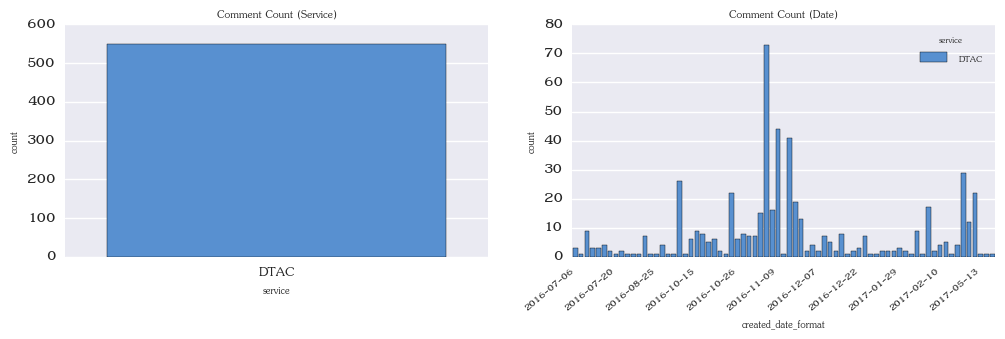

In [21]:
analyzeUserComment('อนันต์ ด้า')

Quite similar to previous commenter.

### Let's look at  คุณ Back Green.
--------------------

Back Green has 139 comments.
Sample comment : 


,message,created_date_format,service
129019,ขยะสังคมจิงๆๆ,2016-07-25,TRUE
34973,เน็ต แม้ง โคด กาก ไอ สาด ควย กาก จิบ ผาย โคด เ...,2016-12-16,DTAC
35035,เบอร์ 0814327907 ไอสาดแก้ไขทีเหอะแม้ง,2016-12-19,DTAC
40975,เน็ตหัวควยยังนี่,2017-01-22,DTAC
45171,หมดไปเยอะละเบอ0814327907,2017-02-05,DTAC
44097,ไอสาด,2017-02-05,DTAC
43835,ถ้าทำเน็ตยังนี้ไปเป็นขอทานดีกว่าฝากบอกผู้บริหา...,2017-02-07,DTAC


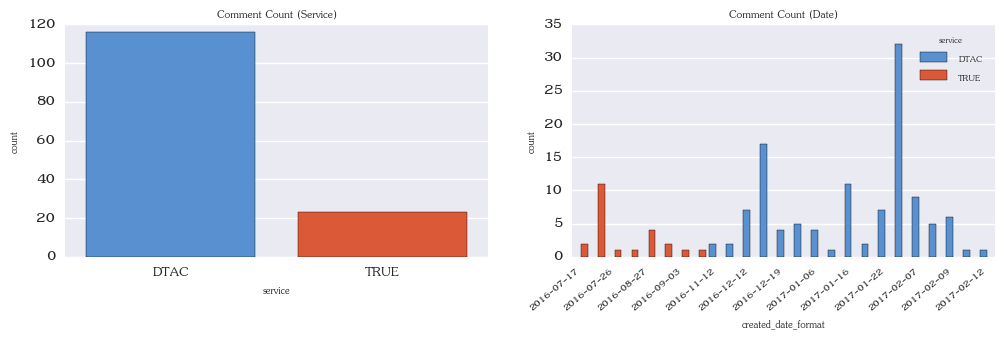

In [22]:
analyzeUserComment('Back Green')

## You can see how the comment shift from True to Dtac. 
-----------------------
This might mean that he/she moved from True to Dtac. From here, we might be able to find churn rate,date just from social media.

In [10]:
commentByDate = commentDf[commentDf['commenter_name']=='Back Green']['created_date_format'].value_counts().sort_index()
x = commentByDate.index.values
y = commentByDate.values

data = [go.Scatter(
          x=x,
          y=y
        )]
py.iplot(data)

TrueMove H has 399 comments.
Sample comment : 


,message,created_date_format,service
132311,คุณธวัชชัย ยาวิชัย\nสำหรับแพ็คเกจเสริมในการใช้...,2016-08-14,TRUE
138044,สวัสดีค่ะ คุณWachara Thongchai หากพบปัญหาการใ...,2016-10-12,TRUE
138961,ทีมงานเรียนคุณ Bast Apiwat ตรวจสอบพื้นที่ ที่แ...,2016-10-30,TRUE
139178,สวัสดีครับ คุณ Atsadavut Pattanapankul แอดมินร...,2016-11-05,TRUE
154031,สวัสดีคุ่ะคุณอุไรรัตน์ กำแพงเงิน ทีมงานยินดีดู...,2017-02-13,TRUE
159955,สวัสดีครับ คุณ Aum Kromkong สำหรับ แคมเปญ Pre...,2017-03-25,TRUE
160837,หากมีข้อมูลสอบถามเพิ่มเติม หรือมีสิ่งใดให้ทางเ...,2017-03-25,TRUE


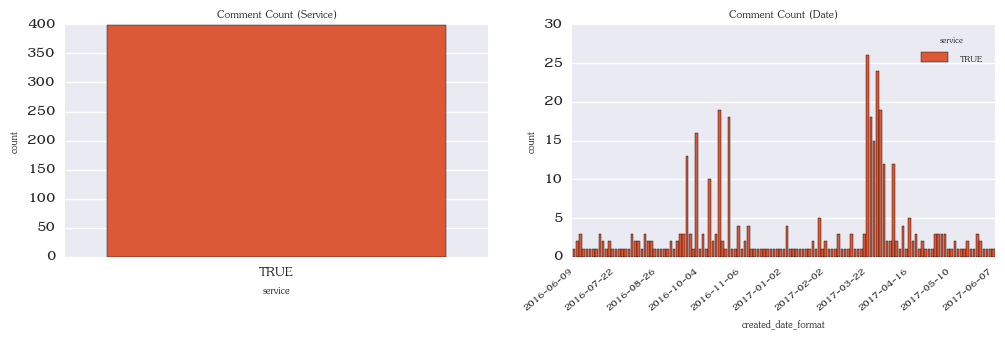

In [25]:
analyzeUserComment('TrueMove H')

AIS has 237 comments.
Sample comment : 


,message,created_date_format,service
64173,สวัสดีครับ คุณ บุญทอง บุญล้อม หากได้ทดลองใช้งา...,2016-06-09,AIS
74008,เฉลย : ศูนย์อาหาร ใครตอบถูกบ้างครับ ยกมือขึ้น,2016-08-15,AIS
76255,สวัสดีครับ จะรักแค่เธอ จะขอหยุดที่เธอ สามารถแ...,2016-09-22,AIS
87704,AIS Facebook Fanpage ขอเรียนแจ้งหยุดกิจกรรม AI...,2016-10-14,AIS
101404,คำตอบคือ 9 ใครตอบถูกกันบ้าง บอกแอดมินหน่อยคร้า...,2017-03-03,AIS
110314,"หมดเวลาร่วมสนุกแล้วนะคร้าบ กับกิจกรรม ""ครอบครั...",2017-04-19,AIS
122509,ประกาศรายชื่อวันที่ 14 มิถุนายน 2560 ผ่านทาง w...,2017-06-01,AIS


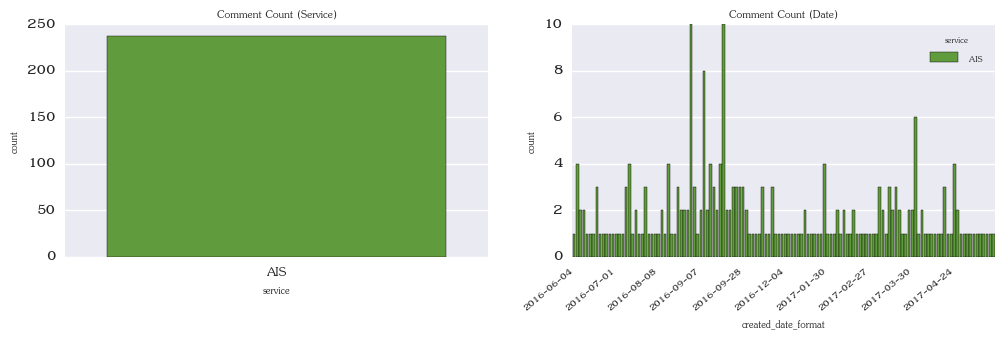

In [28]:
analyzeUserComment('AIS')

dtac has 31 comments.
Sample comment : 


,message,created_date_format,service
12980,***ขณะนี้สิทธิ์ครบแล้วนะคะ***\nดีแทคขอขอบคุณลู...,2016-08-12,DTAC
12946,***ขณะนี้สิทธิ์ครบแล้วนะคะ***\nดีแทคขอขอบคุณลู...,2016-08-12,DTAC
25235,เลือกเบอร์สวยที่ใช่สำหรับคุณ เบอร์ตอง เบอร์เรี...,2016-11-25,DTAC
48787,ร่วมสนุกลุ้นรับตั๋วชมคอนเสิร์ต Billboard Cafe ...,2017-02-27,DTAC
59736,น้องฟ้าขอบคุณที่ใช้ดีแทคนะคะ\r\n\n**8944**,2017-05-05,DTAC
63723,เกิดเหตุก่อการร้ายที่ลอนดอนค่ะ https://www.fac...,2017-06-04,DTAC
63265,น้องฟ้าได้ดูแลคุณ มิน ปิ้นป่อน ตามที่แจ้งปัญหา...,2017-06-05,DTAC


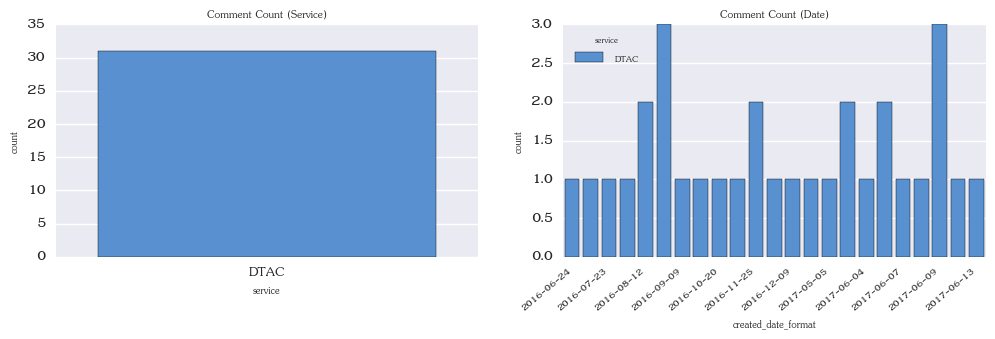

In [23]:
analyzeUserComment('dtac')

Joe KonTummada has 182 comments.
Sample comment : 


,message,created_date_format,service
139028,คุณจะบันทึกบทสนทนาระหว่างลูกค้ากับพนักงานคุณเพ...,2016-11-05,TRUE
139425,ทางเราต้องขอยืนยันว่าในเสียงสนทนาเจ้าหน้าที่ได...,2016-11-09,TRUE
141482,แบบนี้ก็คงยกเลิกก่อน ได้คำตอบเมื่อไหร่หรือดี...,2016-11-21,TRUE
142198,ตอบมาไม่เคยตรงกับคำถาม สัส,2016-11-28,TRUE
142594,ปัญหามีตั้งแต่ปลายเดือนที่แล้ว คือเดือน10 เรื...,2016-11-30,TRUE
142298,ปัญหามีตั้งแต่ปลายเดือนที่แล้ว เรื่องพนักงานบ...,2016-11-30,TRUE
143748,มันตอบกลับมาว่า มีพนักงานติดต่อกลับละ ติดต่...,2016-12-01,TRUE


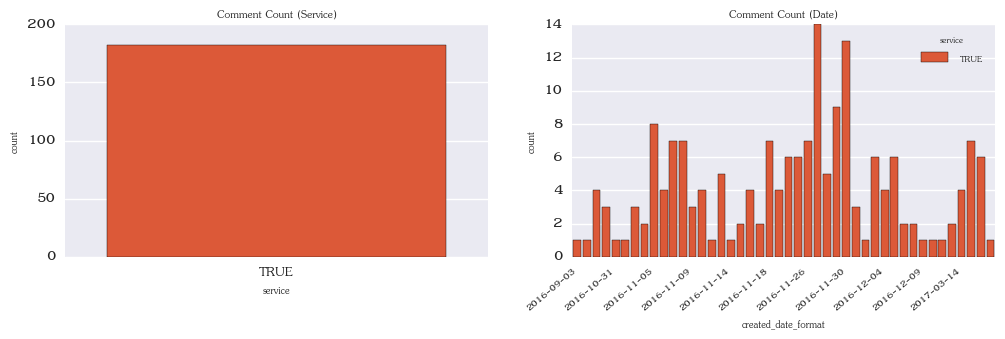

In [26]:
analyzeUserComment('Joe KonTummada')

ถุงเงิน แมวสีสวาท has 22 comments.
Sample comment : 


,message,created_date_format,service
30715,NaN,2016-12-24,DTAC
30710,NaN,2016-12-24,DTAC
30713,NaN,2016-12-24,DTAC
30714,NaN,2016-12-24,DTAC
31103,NaN,2016-12-24,DTAC
31106,NaN,2016-12-24,DTAC
30623,NaN,2016-12-24,DTAC


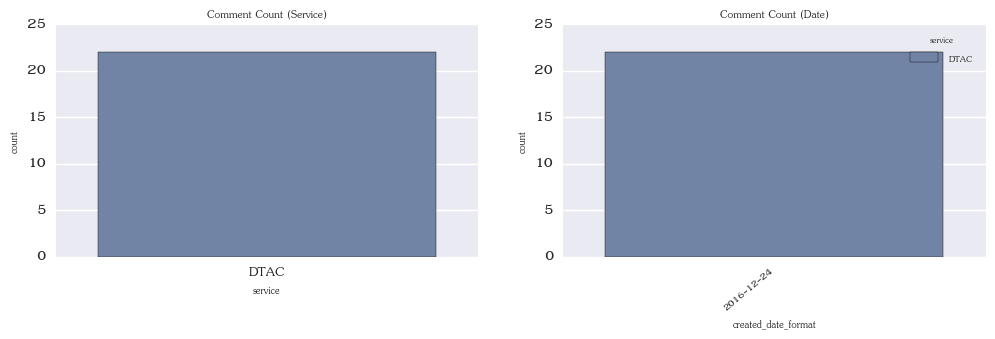

In [32]:
#Randomly select one person to analyze
sampleComment = commentDf['commenter_name'].value_counts().head(750).sample(1)
analyzeUserComment(sampleComment.index[0])

## Here is some interesting case found using the sampling function
----

Pattaraphong Sawadiruttana has 38 comments.
Sample comment : 


,message,created_date_format,service
137031,เติมเงิน หรือ รายเดือน เอาดีๆๆๆ คนอ่าน งง กันห...,2016-10-03,TRUE
38010,ลื่นจนสัญญาณแม่งลื่นหายเนตลื่นไปไหนหมดไม่รู้ 5555,2017-01-07,DTAC
150706,ปังมากโปรนี้ 😘,2017-01-17,TRUE
152186,เฮง เฮง ระบบรายเดือนมีไรพิเศษให้ลูกค้าบ้างครับ...,2017-01-27,TRUE
155939,ว่าจะสอย แต่เห็นสัญญา2ปี !!!!!!!!!,2017-02-25,TRUE
113345,เครื่อง oppo หมดอ่ะเสียดายจะย้ายค่ายสะหน่อย ที...,2017-04-21,AIS
169504,ทรูชอบมินิมีที่ไหนครับแอดมิน,2017-05-05,TRUE


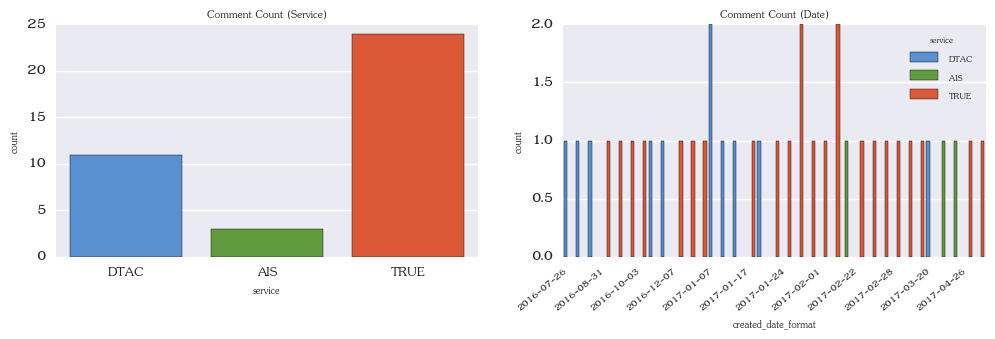

In [32]:
analyzeUserComment('Pattaraphong Sawadiruttana')

In [15]:
commentDf[commentDf['commenter_name']=='Pattaraphong Sawadiruttana'].sort_values('created_date').head(10)

,commenter_name,created_time,like_count,message,service,created_date,created_date_format
11253,Pattaraphong Sawadiruttana,2016-07-26 01:30:38,5.0,เจ๋งมากกกกกกก คอนเฟิร์ม!!! ฟรีๆๆๆๆค่าเนต ฟังเพ...,DTAC,2016-07-26 01:30:38,2016-07-26
11334,Pattaraphong Sawadiruttana,2016-07-27 04:24:07,4.0,กำลังย้ายค่ายเบอร์เดิมไปดีแทครายเดือนแล้วนะ เน...,DTAC,2016-07-27 04:24:07,2016-07-27
12310,Pattaraphong Sawadiruttana,2016-08-08 11:12:33,3.0,เนตไม่ค่อยดีเลยอ่ะ ขึ้น R ตลอด ทั้งที่ทำงานและ...,DTAC,2016-08-08 11:12:33,2016-08-08
134320,Pattaraphong Sawadiruttana,2016-08-31 11:38:14,0.0,เจ้าอื่นๆเค้าเม็กล่ะกี่บาทใครรู้บ้าง,TRUE,2016-08-31 11:38:14,2016-08-31
135847,Pattaraphong Sawadiruttana,2016-09-03 06:01:16,0.0,ลดสีเดียว สีอื่นๆล่ะ,TRUE,2016-09-03 06:01:16,2016-09-03
136845,Pattaraphong Sawadiruttana,2016-09-17 05:56:37,0.0,ชื่นชมครับ คนปกติอย่างเราๆบางคนยังทำไม่ได้อย่า...,TRUE,2016-09-17 05:56:37,2016-09-17
137031,Pattaraphong Sawadiruttana,2016-10-03 06:06:31,0.0,เติมเงิน หรือ รายเดือน เอาดีๆๆๆ คนอ่าน งง กันห...,TRUE,2016-10-03 06:06:31,2016-10-03
20413,Pattaraphong Sawadiruttana,2016-11-08 03:22:22,2.0,แปลกใจทำมัยดีแทคโพสต์ทุกครั้งมีแต่ลูกค้ามาด่า ...,DTAC,2016-11-08 03:22:22,2016-11-08
20570,Pattaraphong Sawadiruttana,2016-11-09 00:38:57,3.0,ตอนแรกจะย้ายค่ายจากทรูไปดีแทค สรุปกูไม่ไปล่ะ อ...,DTAC,2016-11-09 00:38:57,2016-11-09
142971,Pattaraphong Sawadiruttana,2016-12-07 03:41:48,0.0,Lenovo กับ oppo อันไหนดีกว่า,TRUE,2016-12-07 03:41:48,2016-12-07


He was first using AIS. Then he is considering to switch to Dtac, but later change his mind and go to True.

------------------


กุญแจชีวิต เข็มทิศหัวใจ has 10 comments.
Sample comment : 


,message,created_date_format,service
7284,แอดคัฟรบกวนตอบด้วย คือสมัครเน็ตรายเดือน399ไปตั...,2016-07-05,DTAC
7308,แอดทำไมใช้รายเดือนเน็ต399เมื่อวันที่่ 25มิถุนา...,2016-07-05,DTAC
9961,คือไม่รุ้กุจะสมัครเนตรายเดือนเพื่อไร399เล่นห่า...,2016-07-15,DTAC
11907,ไอ้แอดเอาไงวะส่งแชทไปถามก็ไม่ตอบหลายวันแล้วนะต...,2016-08-03,DTAC
23751,ไม่เอาแล้วห่วยแตกสิ้นดีสัสซื้อS1มายังไม่ถึงเดื...,2016-11-21,DTAC
36445,ไม่ต้องรอถึงปีหรอกสัสเพิ่งซื้อมาไม่ถึงเดือนทั้...,2016-12-29,DTAC
97222,A,2017-01-31,AIS


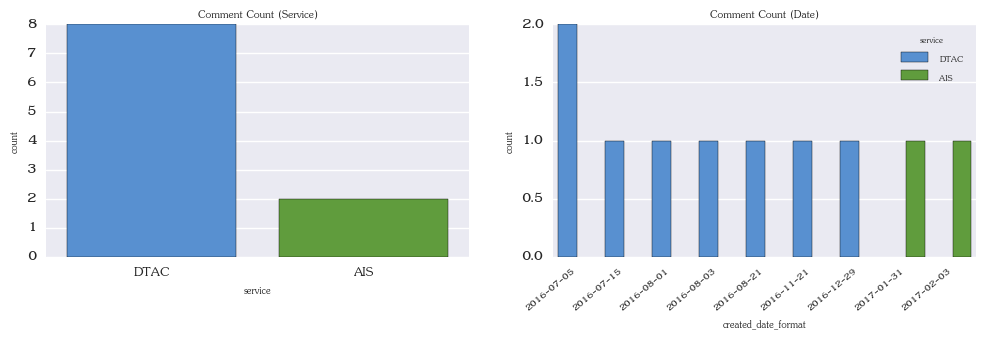

In [33]:
analyzeUserComment('กุญแจชีวิต เข็มทิศหัวใจ')

## He is not happy with dtac facbook admin.
------------

In [17]:
commentDf[commentDf['commenter_name']=='กุญแจชีวิต เข็มทิศหัวใจ'].sort_values('created_date')

,commenter_name,created_time,like_count,message,service,created_date,created_date_format
7308,กุญแจชีวิต เข็มทิศหัวใจ,2016-07-05 05:02:28,0.0,แอดทำไมใช้รายเดือนเน็ต399เมื่อวันที่่ 25มิถุนา...,DTAC,2016-07-05 05:02:28,2016-07-05
7284,กุญแจชีวิต เข็มทิศหัวใจ,2016-07-05 08:16:14,0.0,แอดคัฟรบกวนตอบด้วย คือสมัครเน็ตรายเดือน399ไปตั...,DTAC,2016-07-05 08:16:14,2016-07-05
9961,กุญแจชีวิต เข็มทิศหัวใจ,2016-07-15 05:24:24,6.0,คือไม่รุ้กุจะสมัครเนตรายเดือนเพื่อไร399เล่นห่า...,DTAC,2016-07-15 05:24:24,2016-07-15
11784,กุญแจชีวิต เข็มทิศหัวใจ,2016-08-01 17:12:49,0.0,เหี้ยเถอะกูส่งแชทไปถาม2วันแหละไม่ตอบเอาไงวะกูต...,DTAC,2016-08-01 17:12:49,2016-08-01
11907,กุญแจชีวิต เข็มทิศหัวใจ,2016-08-03 13:00:25,0.0,ไอ้แอดเอาไงวะส่งแชทไปถามก็ไม่ตอบหลายวันแล้วนะต...,DTAC,2016-08-03 13:00:25,2016-08-03
13586,กุญแจชีวิต เข็มทิศหัวใจ,2016-08-21 15:35:30,1.0,เน็ตดีแทคกากมากขนาดใช้รายเดือนนะ,DTAC,2016-08-21 15:35:30,2016-08-21
23751,กุญแจชีวิต เข็มทิศหัวใจ,2016-11-21 15:55:59,0.0,ไม่เอาแล้วห่วยแตกสิ้นดีสัสซื้อS1มายังไม่ถึงเดื...,DTAC,2016-11-21 15:55:59,2016-11-21
36445,กุญแจชีวิต เข็มทิศหัวใจ,2016-12-29 10:06:01,1.0,ไม่ต้องรอถึงปีหรอกสัสเพิ่งซื้อมาไม่ถึงเดือนทั้...,DTAC,2016-12-29 10:06:01,2016-12-29
97222,กุญแจชีวิต เข็มทิศหัวใจ,2017-01-31 10:02:31,0.0,A,AIS,2017-01-31 10:02:31,2017-01-31
97193,กุญแจชีวิต เข็มทิศหัวใจ,2017-02-03 09:09:18,0.0,A,AIS,2017-02-03 09:09:18,2017-02-03


## Here he is complaining about bad signal. If we have social media listener, we might prevent these group of customer from leaving.
------------

In [18]:
commentDf[commentDf['commenter_name']=='Tanawat Setthakorn'].sort_values('created_date')

,commenter_name,created_time,like_count,message,service,created_date,created_date_format
58320,Tanawat Setthakorn,2017-04-22 18:26:53,0.0,ทำไมมันเนตช้ามากเลยอะครับ ตอนนี้ผมใช้โปร 1299 ...,DTAC,2017-04-22 18:26:53,2017-04-22
58325,Tanawat Setthakorn,2017-04-23 02:35:36,0.0,ช่วยมาตอบผมหน่อยครับ,DTAC,2017-04-23 02:35:36,2017-04-23
58506,Tanawat Setthakorn,2017-04-23 02:36:02,0.0,ผมจ่ายไม่ใช่ถูกๆนะครับ 1299!!!,DTAC,2017-04-23 02:36:02,2017-04-23
58370,Tanawat Setthakorn,2017-04-23 02:36:34,0.0,ไม่งั้นย้ายค่ายแน่!!,DTAC,2017-04-23 02:36:34,2017-04-23
58671,Tanawat Setthakorn,2017-04-23 04:32:51,4.0,ทำไมอะ ผมอุตส่าห์ย้ายค่ายมาหาคุณ แต่คุณทำกับผม...,DTAC,2017-04-23 04:32:51,2017-04-23
58426,Tanawat Setthakorn,2017-04-23 04:33:12,1.0,ทำไมอะ ผมอุตส่าห์ย้ายค่ายมาหาคุณ แต่คุณทำกับผม...,DTAC,2017-04-23 04:33:12,2017-04-23
58499,Tanawat Setthakorn,2017-04-23 04:33:26,0.0,ทำไมอะ ผมอุตส่าห์ย้ายค่ายมาหาคุณ แต่คุณทำกับผม...,DTAC,2017-04-23 04:33:26,2017-04-23
58402,Tanawat Setthakorn,2017-04-23 04:33:43,0.0,ทำไมอะ ผมอุตส่าห์ย้ายค่ายมาหาคุณ แต่คุณทำกับผม...,DTAC,2017-04-23 04:33:43,2017-04-23
58087,Tanawat Setthakorn,2017-04-23 04:34:07,1.0,ทำไมอะ ผมอุตส่าห์ย้ายค่ายมาหาคุณ แต่คุณทำกับผม...,DTAC,2017-04-23 04:34:07,2017-04-23
58037,Tanawat Setthakorn,2017-04-23 04:34:32,0.0,ทำไมอะ ผมอุตส่าห์ย้ายค่ายมาหาคุณ แต่คุณทำกับผม...,DTAC,2017-04-23 04:34:32,2017-04-23


In [19]:
commentDf[commentDf['commenter_name']=='ผ่านมา แค่ให้จำ'].sort_values('created_date')

,commenter_name,created_time,like_count,message,service,created_date,created_date_format
67373,ผ่านมา แค่ให้จำ,2016-07-15 04:37:26,1.0,ลูกค้าเก่า คุณไม่ดูแล ใช้มาเกือบ10ปี โปรแพง พอ...,AIS,2016-07-15 04:37:26,2016-07-15
69755,ผ่านมา แค่ให้จำ,2016-07-21 13:36:40,0.0,ไหนบอกเต็มสปีด 3G จะหมดก่อน 30 วันอยู่เหรอค่ะ,AIS,2016-07-21 13:36:40,2016-07-21
9950,ผ่านมา แค่ให้จำ,2016-07-29 09:55:19,0.0,มันยกเลิกสัญญาทาสไม่ได้ติคับ จรดปักกาเซ็นสัญญา...,DTAC,2016-07-29 09:55:19,2016-07-29
12780,ผ่านมา แค่ให้จำ,2016-08-12 10:00:17,0.0,อยากได้สักเครื่องทำงัย คับเห็นบอกของหมด ไหนๆจะ...,DTAC,2016-08-12 10:00:17,2016-08-12
12779,ผ่านมา แค่ให้จำ,2016-08-12 10:05:08,0.0,สำหรับท่านๆ ที่ได้มาแล้ว รีวิวให้ดูหน่อยคับถ้า...,DTAC,2016-08-12 10:05:08,2016-08-12
32393,ผ่านมา แค่ให้จำ,2016-12-11 06:20:11,0.0,ห่วยมากๆๆๆๆๆๆๆๆๆ,DTAC,2016-12-11 06:20:11,2016-12-11
146850,ผ่านมา แค่ให้จำ,2016-12-28 10:41:41,0.0,รายงานปันหาไปก้อเหมือนเดิม..ไม่มีอะรัยดีขึ้น.....,TRUE,2016-12-28 10:41:41,2016-12-28
48897,ผ่านมา แค่ให้จำ,2017-02-18 06:24:13,0.0,4g ในเมืองมีสัญญาณแค่เนี้ยดูเอา,DTAC,2017-02-18 06:24:13,2017-02-18
100382,ผ่านมา แค่ให้จำ,2017-02-23 15:47:22,1.0,แดกไป เกือบพันเลยเดือนนี้จะเลิกชั้ยจิงๆแระย้าย...,AIS,2017-02-23 15:47:22,2017-02-23
104047,ผ่านมา แค่ให้จำ,2017-03-11 13:46:37,0.0,ใช้เน็ตรายเดือนเล่นได้เดือนเดียวไม่ค้างค่างวดส...,AIS,2017-03-11 13:46:37,2017-03-11


## And much more. 
-------------------
We can know users story from these comments. Imagine combine with machine learning model that can detect whether the comment is unhappy or not. We can prevent a large portion of user from leaving.